In [1]:
from sklearn import datasets
iris=datasets.load_iris() #사이킷런에 내장된 iris 데이터셋 로딩

In [2]:
import pandas as pd
X=pd.DataFrame(iris.data) #iris 데이터
X.columns=['Sepal_Length','Sepal_Width',
         'Petal_Length','Petal_Width']
y=pd.DataFrame(iris.target) #품종
y.columns=['Targets']
df=pd.concat([X,y],axis=1) #데이터프레임 가로방향 연결
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Targets
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


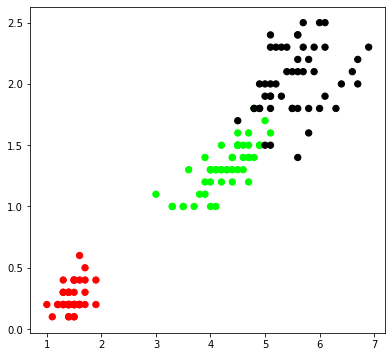

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(14,6)) #가로14,세로7인치 그래프
colormap=np.array(['red','lime','black']) #색상배열
plt.scatter(X.Sepal_Length, X.Sepal_Width,c=colormap[y.Targets],
           s=40) #꽃받침 기준 그래프
plt.subplot(1,2,2) #1행 2열중 2번 그래프
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],
           s=40)

In [4]:
#군집갯수를 3으로 설정한 모형
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3, random_state=0)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [5]:
model.labels_ #모형이 분류한 라벨

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [6]:
y.Targets.values #실제값

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

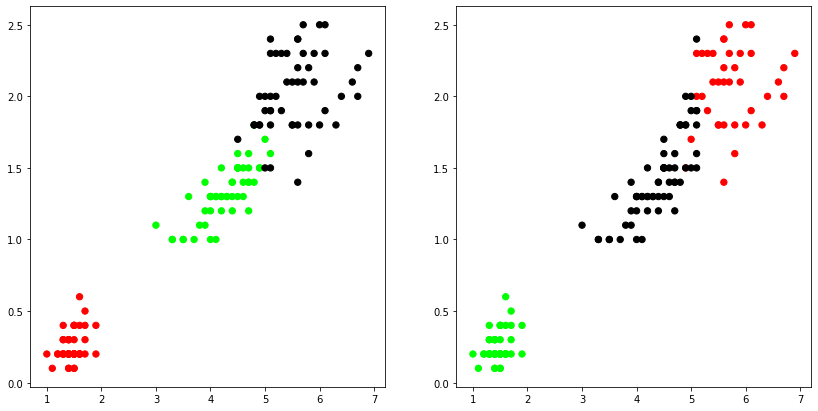

In [7]:
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])
plt.subplot(1,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],
           s=40)
#모형이 분류한 값
plt.subplot(1,2,2) #1행 2열 중 2번 그래프
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[model.labels_],
           s=40)

In [8]:
# 0,1,2 => 2,0,1
pred=np.choose(model.labels_,[2,0,1]).astype(np.int64)
print(model.labels_)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


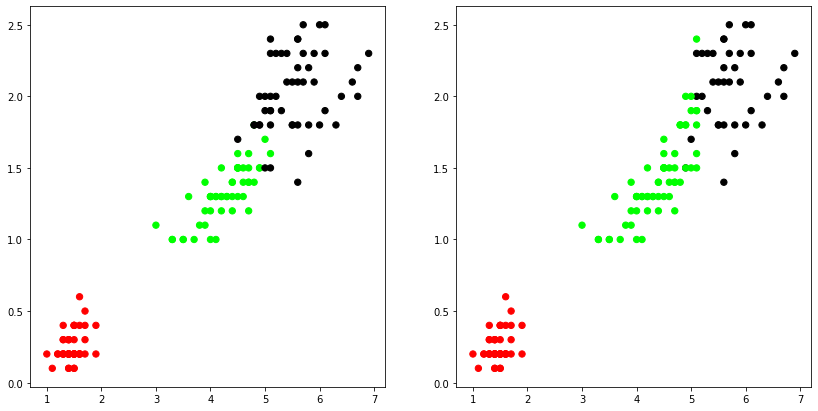

In [9]:
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])
plt.subplot(1,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],
           s=40)
#모형이 분류한 값
plt.subplot(1,2,2) #1행 2열 중 2번 그래프
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[pred],
           s=40)

In [10]:
from sklearn.metrics import silhouette_score
silhouette_score(X,pred)

0.5528190123564091

C:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


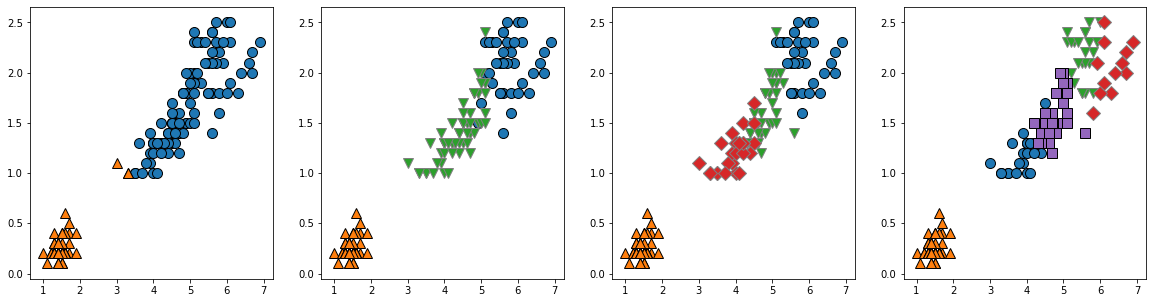

In [11]:
import mglearn
fig,axes=plt.subplots(1,4,figsize=(20,5))
idx=0
for k in [2,3,4,5]: #군집갯수 2~5개일 경우의 산점도 그래프
    kmeans=KMeans(n_clusters=k) #군집갯수
    kmeans.fit(X) #군집화
    lbls=kmeans.labels_ #모형이 분류한 라벨
    mglearn.discrete_scatter(X['Petal_Length'],X['Petal_Width'],lbls,
                            ax=axes[idx])
    idx+=1